# Importing Libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif

import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn
from keras.wrappers.scikit_learn import KerasClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [37]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis/02-21-2018.csv',low_memory=False)
df = pd.DataFrame(dataset)

df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,21/02/2018 08:33:25,37953,5,3,135,127,135,0,27.0,60.373835,127,0,42.333333,73.323484,6903.275103,210.787026,5.421857e+03,5.403580e+03,12099,23,37953,9488.25,3.245485e+03,12382,6013,19960,9980.0,13546.75171,19559,401,0,0,0,0,168,104,131.741891,79.045135,0,135,29.111111,57.800183,3340.861111,0,0,0,1,0,0,0,0,0,32.750000,27.0,42.333333,0,0,0,0,0,0,5,135,3,127,29200,219,1,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,500.0,0.000000,0,0,0.000000,0.000000,12.757980,0.025516,5.880000e+07,2.380000e+07,75600000,42000000,118000000,58800000.00,2.380000e+07,75600000,42000000,0,0.0,0.00000,0,0,0,0,0,0,24,0,0.025516,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,666.666667,500.0,0.000000,0,0,0,0,0,0,3,1500,0,0,-1,-1,2,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
2,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,500.0,0.000000,0,0,0.000000,0.000000,12.757980,0.025516,5.880000e+07,2.380000e+07,75600000,42000000,118000000,58800000.00,2.380000e+07,75600000,42000000,0,0.0,0.00000,0,0,0,0,0,0,24,0,0.025516,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,666.666667,500.0,0.000000,0,0,0,0,0,0,3,1500,0,0,-1,-1,2,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
3,500,17,21/02/2018 08:33:11,99743998,5,0,2500,0,500,500,500.0,0.000000,0,0,0.000000,0.000000,25.064165,0.050128,2.490000e+07,3.400000e+07,75600000,4000290,99700000,24900000.00,3.400000e+07,75600000,4000290,0,0.0,0.00000,0,0,0,0,0,0,40,0,0.050128,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,600.000000,500.0,0.000000,0,0,0,0,0,0,5,2500,0,0,-1,-1,4,8,4000290.0,0.0,4000290,4000290,31900000.0,37900000.0,75600000,7200397,Benign
4,500,17,21/02/2018 08:33:11,99743999,5,0,2500,0,500,500,500.0,0.000000,0,0,0.000000,0.000000,25.064165,0.050128,2.490000e+07,3.400000e+07,75600000,4000286,99700000,24900000.00,3.400000e+07,75600000,4000286,0,0.0,0.00000,0,0,0,0,0,0,40,0,0.050128,0.000000,500,500,500.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,600.000000,500.0,0.000000,0,0,0,0,0,0,5,2500,0,0,-1,-1,4,8,4000286.0,0.0,4000286,4000286,31900000.0,37900000.0,75600000,7200399,Benign


In [38]:
# encoding catagorical data 
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
df['Label'].unique()

array([0, 2, 1])

In [39]:
# parsing object dtype to date & time dtype
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d/%m/%Y %H:%M:%S")
# convert date & time dtype into float dtype
df['Timestamp'] = df['Timestamp'].values.astype(float)

In [40]:
# data cleaning
np.seterr(divide='ignore', invalid='ignore')
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)
print(df)

         Dst Port  Protocol     Timestamp  ...    Idle Max    Idle Min  Label
0            80.0       6.0  1.519202e+18  ...         0.0         0.0    0.0
1           500.0      17.0  1.519202e+18  ...  75600000.0  42000000.0    0.0
2           500.0      17.0  1.519202e+18  ...  75600000.0  42000000.0    0.0
3           500.0      17.0  1.519202e+18  ...  75600000.0   7200397.0    0.0
4           500.0      17.0  1.519202e+18  ...  75600000.0   7200399.0    0.0
...           ...       ...           ...  ...         ...         ...    ...
1048570   55484.0       6.0  1.519180e+18  ...         0.0         0.0    0.0
1048571   57624.0       6.0  1.519180e+18  ...         0.0         0.0    0.0
1048572   57623.0       6.0  1.519180e+18  ...         0.0         0.0    0.0
1048573   57625.0       6.0  1.519180e+18  ...         0.0         0.0    0.0
1048574   58120.0       6.0  1.519180e+18  ...         0.0         0.0    0.0

[1048575 rows x 80 columns]


In [41]:
x = df.iloc[: 200000, :-1].values
y = df.iloc[: 200000, -1].values

In [42]:
#After applying smote
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=0, n=196055 (33.333%)
Class=2, n=196055 (33.333%)
Class=1, n=196055 (33.333%)


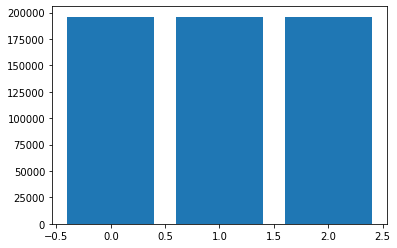

In [43]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [44]:
print(x.shape)
print(y.shape)

(588165, 79)
(588165,)


In [45]:
df['Label'].value_counts()

1.0    686012
0.0    360833
2.0      1730
Name: Label, dtype: int64

In [46]:
# handling missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x)
x=imputer.transform(x)
print(x)

[[8.00000000e+01 6.00000000e+00 1.51920200e+18 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.00000000e+02 1.70000000e+01 1.51920199e+18 ... 2.38000000e+07
  7.56000000e+07 4.20000000e+07]
 [5.00000000e+02 1.70000000e+01 1.51920199e+18 ... 2.38000000e+07
  7.56000000e+07 4.20000000e+07]
 ...
 [8.00000000e+01 1.70000000e+01 1.51920907e+18 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.00000000e+01 1.70000000e+01 1.51920882e+18 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.00000000e+01 1.70000000e+01 1.51920968e+18 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1) 

In [48]:
# feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


'\nsc = StandardScaler()\nx_train = sc.fit_transform(x_train)\nx_test = sc.transform(x_test)\n\n'

# Constant Feature Removal

In [49]:
# convert the x_train and x_test array into dataframe
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
print(x_train)
print(x_test)

          0     1             2   ...            76            77            78
0       80.0   6.0  1.519179e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
1       80.0  17.0  1.519209e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
2       80.0   6.0  1.519179e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
3       80.0   6.0  1.519179e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
4       80.0  17.0  1.519209e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
...      ...   ...           ...  ...           ...           ...           ...
470527  80.0  17.0  1.519210e+18  ...  1.361036e+07  3.725820e+07  7.115591e+06
470528  80.0  17.0  1.519210e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
470529  80.0  17.0  1.519209e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
470530  80.0  17.0  1.519208e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
470531  80.0   6.0  1.519179e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00

[470532 rows x 79 columns]
            

In [50]:
sel = VarianceThreshold(threshold=0)
sel.fit(x_train)

VarianceThreshold(threshold=0)

In [51]:
# number of non-constant features
sum(sel.get_support())

69

In [52]:
# print the constant features

print(len([k for k in x_train.columns
           if k not in x_train.columns[sel.get_support()] ]))
[k for k in x_train.columns if k not in x_train.columns[sel.get_support()] ]

10


[33, 34, 35, 51, 57, 58, 59, 60, 61, 62]

In [53]:
# remove constant features 

x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

x_train.shape, x_test.shape

((470532, 69), (117633, 69))

In [54]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# Duplicate Feauturs

In [55]:
# Identify duplicate feature
duplicate_feature = []
for i in range(0, len(x_train.columns)):
  if i%10 == 0:
    print(i)

  col1 = x_train.columns[i]

  for col2 in x_train.columns[i+1:]:
    if x_train[col1].equals(x_train[col2]):
      duplicate_feature.append(col2)

0
10
20
30
40
50
60


In [56]:
# show the features which are removed
print(len(set(duplicate_feature)))
set(duplicate_feature)

8


{43, 48, 51, 52, 53, 54, 55, 56}

In [57]:
# show the duplicate features
duplicated_feat = []
for i in range(0, len(x_train.columns)):

    col_1 = x_train.columns[i]

    for col_2 in x_train.columns[i + 1:]:

        # if the features are duplicated
        if x_train[col_1].equals(x_train[col_2]):

            #print them
            print(col_1)
            print(col_2)
            print()

            # and then append the duplicated one to a list
            duplicated_feat.append(col_2)

4
53

5
55

6
54

7
56

10
51

14
52

32
43

44
48



In [58]:
# remove duplicate features
x_train = x_train.drop(duplicate_feature,axis=1)
x_test = x_test.drop(duplicate_feature,axis=1)

x_train.shape, x_test.shape

((470532, 61), (117633, 61))

In [59]:
print(x_train)
print(x_test)

          0     1             2   ...            66            67            68
0       80.0   6.0  1.519179e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
1       80.0  17.0  1.519209e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
2       80.0   6.0  1.519179e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
3       80.0   6.0  1.519179e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
4       80.0  17.0  1.519209e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
...      ...   ...           ...  ...           ...           ...           ...
470527  80.0  17.0  1.519210e+18  ...  1.361036e+07  3.725820e+07  7.115591e+06
470528  80.0  17.0  1.519210e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
470529  80.0  17.0  1.519209e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
470530  80.0  17.0  1.519208e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00
470531  80.0   6.0  1.519179e+18  ...  0.000000e+00  0.000000e+00  0.000000e+00

[470532 rows x 61 columns]
            

In [60]:
fs_train = SelectKBest(score_func = f_classif).fit(x_train, y_train)
score_column = list(fs_train.scores_)
cols = list(x_train.columns)
top_features = pd.DataFrame(zip(cols, score_column), columns = ['Feature', 'Score'])
top20 = top_features.nlargest(20, 'Score')
top20 = top20.reset_index(drop = True)

top20

,Feature,Score
0,2,3.979365e+06
1,59,3.026416e+06
2,4,3.026386e+06
3,33,3.026247e+06
4,6,3.026064e+06
5,3,1.168621e+06
6,57,1.165314e+06
7,22,1.159788e+06
8,1,1.093045e+06
9,67,6.695533e+05


In [61]:
fs_train = SelectKBest(f_classif, k = 20).fit(x_train, y_train)
x_train_new = fs_train.transform(x_train)

fs_test = SelectKBest(f_classif, k = 20).fit(x_test, y_test)
x_test_new = fs_test.transform(x_test)

x_train_new = pd.DataFrame(x_train_new)
x_test_new = pd.DataFrame(x_test_new)

x_train_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.0,1.519179e+18,2.574600e+04,3.000000,3.090000e+02,6.633123e+03,1.452800e+04,1.480100e+04,7.400500e+03,1.007981e+04,1.452800e+04,72.000000,65535.0,1.000000,20.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
1,17.0,1.519209e+18,1.199071e+08,111092.084875,3.554947e+06,2.119005e+04,8.564058e+05,1.200000e+08,1.086411e+03,2.119005e+04,8.564058e+05,888736.679001,-1.0,111091.084875,8.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
2,6.0,1.519179e+18,2.636100e+04,3.000000,2.670000e+02,6.716805e+03,1.412200e+04,1.221600e+04,6.108000e+03,8.206681e+03,1.191100e+04,72.000000,65535.0,1.000000,20.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
3,6.0,1.519179e+18,1.182400e+04,3.000000,2.880000e+02,4.515956e+03,1.118400e+04,1.153800e+04,5.769000e+03,7.657966e+03,1.118400e+04,72.000000,65535.0,1.000000,20.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
4,17.0,1.519209e+18,1.198157e+08,111945.821935,3.582266e+06,2.084633e+04,7.722202e+05,1.200000e+08,1.071362e+03,2.084633e+04,7.722202e+05,895566.575477,-1.0,111944.821935,8.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470527,17.0,1.519210e+18,6.623631e+07,4.722830,1.511306e+02,1.459069e+07,3.725820e+07,6.623924e+07,1.718371e+07,1.459069e+07,3.725820e+07,37.782640,-1.0,3.722830,8.0,0.0,0.0,1.787637e+07,1.361036e+07,3.725820e+07
470528,17.0,1.519210e+18,1.104551e+08,124420.486673,3.981456e+06,1.769848e+04,5.859772e+05,1.102729e+08,8.919888e+02,1.769848e+04,5.859772e+05,995363.893387,-1.0,124419.486673,8.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
470529,17.0,1.519209e+18,1.197080e+08,114230.719064,3.655383e+06,2.155245e+04,7.933764e+05,1.200000e+08,1.073409e+03,2.155245e+04,7.933764e+05,913845.752513,-1.0,114229.719064,8.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
470530,17.0,1.519208e+18,1.194974e+08,80380.308087,2.572170e+06,2.966586e+04,9.179666e+05,1.190000e+08,1.486681e+03,2.966586e+04,9.179666e+05,643042.464695,-1.0,80379.308087,8.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00


In [62]:
# Applying KNN
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(x_train_new, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [63]:
score = cross_val_score(classifier, x_train_new, y_train, cv = 5)
print("%.2f Accuracy with the standard deviation %.2f" % (score.mean(), score.std()))

0.96 Accuracy with the standard deviation 0.00


In [64]:
y_predict = classifier.predict(x_test_new)
print("The f1_score of KNN is %.2f" % f1_score(y_test, y_predict, average='micro'))

The f1_score of KNN is 0.97


In [65]:
# applying Decision Tree
classfier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_new, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [66]:
y_predict = classifier.predict(x_test_new)
print("The f1_score of Decision tree is %.2f" % f1_score(y_test, y_predict, average='micro'))

The f1_score of Decision tree is 0.97


In [67]:
score = cross_val_score(classifier, x_train_new, y_train, cv = 5)
print("%.2f Accuracy with the standard deviation %.2f" % (score.mean(), score.std()))

0.96 Accuracy with the standard deviation 0.00
